# Explore Curation Events

In [1]:
# standard imports
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
from eth_utils import keccak
#from web3 import Web3

In [2]:
# function used to query each type of event from The Graph
def query_theGraph(raw_query, field_name, url, trans_type, verbose=False):

    query_parts =raw_query.split(')')
    paginator = ", where: {}" 
    n = 0
    records = []
    while n < 1000:
        if (n == 0):
            # order by blockNumber to get all events, as deafult ordering is by id
            query = 'query '+query_parts[0] + 'orderBy:blockNumber, where:{blockNumber_gt: 0, type:' + trans_type +'})' + query_parts[1]
        else:
            query = 'query '+query_parts[0]+ 'orderBy:blockNumber, where: {blockNumber_gt: ' + str(indexer) + ', type:' + trans_type +'})'+query_parts[1]

        if verbose:
            print(query)

        r = requests.post(url, json = {'query':query})

        try:
            d = json.loads(r.content)['data'][field_name]
        except:
            print(r.content)
            errors = json.loads(r.content)['errors']
            print(errors)
            for e in errors:
                print(e['message'])

        #print(f'results {len(d)}')
        records.extend(d)
        #print(f'total {len(records)}')
        try:
            indexer = d[-1]['blockNumber']
        except:
            print('noblock')
        
        n += 1
        if len(d) < 99:
            break
        
    return pd.DataFrame(records)

In [3]:
#get mintSignal event
url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/graph-network-mainnet'

minted_query = '''query{
  signalTransactions() {
    id
    blockNumber
    signer{
      curator
      {
        id
      }
    }
    signal
    tokens
    type
    subgraphDeployment{
     id
    } 
  }  
}
'''

field_name = 'signalTransactions'
trans_type = 'MintSignal'

curation_mint_df = query_theGraph(minted_query, field_name, url, trans_type, False)

In [4]:
#alloc_created_df.to_csv('allocationCreateds.csv', index = False, header = True)
curation_mint_df.head()

,id,blockNumber,signer,signal,tokens,type,subgraphDeployment
0,0x4c1060853752b5221b1e27c2264034d0bd5fd86c5267...,11474121,{'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...,279284800875378823397,78000000000000000000000,MintSignal,{'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...
1,0xea7dbe2f6164530a53ac8cf9d99b46993f44d8ca8258...,11476852,{'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...,627949250367270370,351147682958369832716,MintSignal,{'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...
2,0xfbdb37e510284ebbeb45fbfdf28191219faf84bc31bf...,11476875,{'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...,125503147008134479971,86010901965910864972811,MintSignal,{'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...
3,0xfbda17a348fb979ad36e27445d656b23458a938fadd2...,11476931,{'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...,89477475325111327822,80557400454965249175744,MintSignal,{'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...
4,0x395da0c992967e085a68fd69825c8f629486ef10d48b...,11531681,{'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...,1568268903568881,975000000000000000,MintSignal,{'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...


In [5]:
curation_mint_df['signer'] = [i['curator']['id'] for i in curation_mint_df['signer']]
curation_mint_df['subgraphDeployment']  = [i['id'] for i in curation_mint_df['subgraphDeployment']]
curation_mint_df.head()

,id,blockNumber,signer,signal,tokens,type,subgraphDeployment
0,0x4c1060853752b5221b1e27c2264034d0bd5fd86c5267...,11474121,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,279284800875378823397,78000000000000000000000,MintSignal,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...
1,0xea7dbe2f6164530a53ac8cf9d99b46993f44d8ca8258...,11476852,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,627949250367270370,351147682958369832716,MintSignal,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...
2,0xfbdb37e510284ebbeb45fbfdf28191219faf84bc31bf...,11476875,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,125503147008134479971,86010901965910864972811,MintSignal,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...
3,0xfbda17a348fb979ad36e27445d656b23458a938fadd2...,11476931,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,89477475325111327822,80557400454965249175744,MintSignal,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...
4,0x395da0c992967e085a68fd69825c8f629486ef10d48b...,11531681,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,1568268903568881,975000000000000000,MintSignal,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...


In [6]:
len(curation_mint_df)

7629

In [7]:
#get BurnSignal event
url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/graph-network-mainnet'

created_query = '''query{
  signalTransactions() {
    id
    blockNumber
    signer{
      curator
      {
        id
      }
    }
    signal
    tokens
    type
    subgraphDeployment{
     id
    } 
  }  
}
'''

field_name = 'signalTransactions'
trans_type = 'BurnSignal'

curation_burned_df = query_theGraph(created_query, field_name, url, trans_type, False)

In [8]:
curation_burned_df.head()

,id,blockNumber,signer,signal,tokens,type,subgraphDeployment
0,0xf5fd904385312b521779beb91a757a403132ebf7bbf7...,11486499,{'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...,89477475325111327822,80557400454965249175496,BurnSignal,{'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...
1,0x7b0d39ca37ba86fd5e6ecc4433513ffba4b853a90bd2...,11491383,{'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...,95,77029,BurnSignal,{'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...
2,0xe46b8054c269f1c5811dc5cdd0d4564bb92f370477df...,11491393,{'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...,95000000000000000000,68004020455437308993046,BurnSignal,{'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...
3,0x620c0af5345f21ec87c9b73864d3709d735fb7aac155...,11531871,{'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...,1568268903568881,975006929934390676,BurnSignal,{'id': '0x31edcacc9a53bc8ab4be2eeb0d873409da4c...
4,0x10afff8568c6e870a7b596787cb284e43842892e3a74...,12318426,{'curator': {'id': '0xadca0dd4729c8ba3acf3e99f...,1000000000000000000,545931348525571351761,BurnSignal,{'id': '0xbbde25a2c85f55b53b7698b9476610c3d120...


In [9]:
curation_burned_df['signer'] = [i['curator']['id'] for i in curation_burned_df['signer']]
curation_burned_df['subgraphDeployment']  = [i['id'] for i in curation_burned_df['subgraphDeployment']]
curation_burned_df.head()

,id,blockNumber,signer,signal,tokens,type,subgraphDeployment
0,0xf5fd904385312b521779beb91a757a403132ebf7bbf7...,11486499,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,89477475325111327822,80557400454965249175496,BurnSignal,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...
1,0x7b0d39ca37ba86fd5e6ecc4433513ffba4b853a90bd2...,11491383,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,95,77029,BurnSignal,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...
2,0xe46b8054c269f1c5811dc5cdd0d4564bb92f370477df...,11491393,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,95000000000000000000,68004020455437308993046,BurnSignal,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...
3,0x620c0af5345f21ec87c9b73864d3709d735fb7aac155...,11531871,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,1568268903568881,975006929934390676,BurnSignal,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...
4,0x10afff8568c6e870a7b596787cb284e43842892e3a74...,12318426,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,1000000000000000000,545931348525571351761,BurnSignal,0xbbde25a2c85f55b53b7698b9476610c3d1202d88870e...


In [10]:
# get data of existing indexer
indexer_df = pd.read_csv('../another_indexer/single_indexer/singleIndexer.csv', low_memory = False)
indexer_df.head()
#len(indexer_df)

,level_0,index,allocationID,blockNumber,epoch,id,indexer,logIndex,subgraphDeploymentID,tokens,...,shares,eventTime,until,indexingRewardCut,queryFeeCut,delegationFees,amount,signer,signal,subgraphDeployment
0,0.0,0.0,NaN,11474009,NaN,0xcb621a8a549e4e3c616a7a1e27dc92b28722c90ac37f...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,121.0,NaN,NaN,...,NaN,NaN,NaN,1000000.0,1000000.0,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,11474009,NaN,0xcb621a8a549e4e3c616a7a1e27dc92b28722c90ac37f...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,122.0,NaN,9615385000000000000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,NaN,11474307,NaN,0x938641c2dbfd4562c7ab8c60ca98f11394d161ead6b9...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,17.0,NaN,165851137200000000000000,...,165851137200000000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3.0,NaN,11474332,NaN,0x67278b0af539dff48945b3a430ada90de00526aed433...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,38.0,NaN,251819644650000000000000,...,251819644650000000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4.0,NaN,11474426,NaN,0x19cf8bd30df43cc8518c16bfce7297c32495bbc3c4c1...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,162.0,NaN,NaN,...,NaN,NaN,NaN,90000.0,80000.0,NaN,NaN,NaN,NaN,NaN


In [11]:
# filter events for subgraphs
subgraph_df = indexer_df[indexer_df['subgraphDeploymentID'].isna() != 1]

In [12]:
# create list of subgraphs indexer is involved in
unique_subgraphs = subgraph_df['subgraphDeploymentID'].unique()

In [13]:
unique_subgraphs[1]

'0x500a8e47cbdeca7386448ae9e7d52578871b9942ebbef4892469da293bb661f9'

In [14]:
# combine mint and burn events
indexer_curation_df = curation_mint_df[curation_mint_df['subgraphDeployment'].isin(unique_subgraphs)].append(curation_burned_df[curation_burned_df['subgraphDeployment'].isin(unique_subgraphs)])

In [15]:
indexer_curation_df.head()

,id,blockNumber,signer,signal,tokens,type,subgraphDeployment
0,0x4c1060853752b5221b1e27c2264034d0bd5fd86c5267...,11474121,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,279284800875378823397,78000000000000000000000,MintSignal,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...
1,0xea7dbe2f6164530a53ac8cf9d99b46993f44d8ca8258...,11476852,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,627949250367270370,351147682958369832716,MintSignal,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...
2,0xfbdb37e510284ebbeb45fbfdf28191219faf84bc31bf...,11476875,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,125503147008134479971,86010901965910864972811,MintSignal,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...
3,0xfbda17a348fb979ad36e27445d656b23458a938fadd2...,11476931,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,89477475325111327822,80557400454965249175744,MintSignal,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...
4,0x395da0c992967e085a68fd69825c8f629486ef10d48b...,11531681,0xadca0dd4729c8ba3acf3e99f3a9f471ef37b6825,1568268903568881,975000000000000000,MintSignal,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...


In [16]:
len(indexer_curation_df)

1771

In [17]:
# add curation events to existing indexer dataframe
single_indexer_df = indexer_df.append(indexer_curation_df)
single_indexer_df.sort_values(by='blockNumber')
single_indexer_df.drop(['level_0', 'index'], axis = 1, inplace = True)
single_indexer_df.head()

,allocationID,blockNumber,epoch,id,indexer,logIndex,subgraphDeploymentID,tokens,type,isDelegator,...,shares,eventTime,until,indexingRewardCut,queryFeeCut,delegationFees,amount,signer,signal,subgraphDeployment
0,NaN,11474009,NaN,0xcb621a8a549e4e3c616a7a1e27dc92b28722c90ac37f...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,121.0,NaN,NaN,delegationParametersUpdateds,NaN,...,NaN,NaN,NaN,1000000.0,1000000.0,NaN,NaN,NaN,NaN,NaN
1,NaN,11474009,NaN,0xcb621a8a549e4e3c616a7a1e27dc92b28722c90ac37f...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,122.0,NaN,9615385000000000000000000,stakeDepositeds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,11474307,NaN,0x938641c2dbfd4562c7ab8c60ca98f11394d161ead6b9...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,17.0,NaN,165851137200000000000000,stakeDelegateds,NaN,...,165851137200000000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,11474332,NaN,0x67278b0af539dff48945b3a430ada90de00526aed433...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,38.0,NaN,251819644650000000000000,stakeDelegateds,NaN,...,251819644650000000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,11474426,NaN,0x19cf8bd30df43cc8518c16bfce7297c32495bbc3c4c1...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,162.0,NaN,NaN,delegationParametersUpdateds,NaN,...,NaN,NaN,NaN,90000.0,80000.0,NaN,NaN,NaN,NaN,NaN


In [18]:
len(single_indexer_df)

12150

In [19]:
# save all events for the indexer
single_indexer_df.to_csv('../another_indexer/single_indexer/singleIndexer.csv', index = False, header = True)

# GNS Exploration

In [20]:
#get MintNSignal event
url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/graph-network-mainnet'

name_mint_query = '''query{
  nameSignalTransactions(){
    id
    blockNumber
    signer{
      curator{
        id
      }
    }
    type
    nameSignal
    versionSignal
    tokens
    subgraph{
      id
      currentVersion
      {
        version
        subgraphDeployment {
          id
        }
      }
      displayName
    }
  }
}
'''

field_name = 'nameSignalTransactions'
trans_type = 'MintNSignal'

name_mint_df = query_theGraph(name_mint_query, field_name, url, trans_type, False)

In [21]:
name_mint_df.head()

,id,blockNumber,signer,type,nameSignal,versionSignal,tokens,subgraph
0,0x4c1060853752b5221b1e27c2264034d0bd5fd86c5267...,11474121,{'curator': {'id': '0x93606b27cb5e4c780883ec4f...,MintNSignal,279284800875378823397,279284800875378823397,80000000000000000000000,{'id': 'ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasU...
1,0xea7dbe2f6164530a53ac8cf9d99b46993f44d8ca8258...,11476852,{'curator': {'id': '0x0f3cf18b37c55f5a319d6cae...,MintNSignal,627949250367270370,627949250367270370,360151469700892136118,{'id': 'ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasU...
2,0xfbdb37e510284ebbeb45fbfdf28191219faf84bc31bf...,11476875,{'curator': {'id': '0x0f3cf18b37c55f5a319d6cae...,MintNSignal,125503147008134479971,125503147008134479971,88216309708626528177242,{'id': 'ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasU...
3,0xfbda17a348fb979ad36e27445d656b23458a938fadd2...,11476931,{'curator': {'id': '0xb6916933aa0bac4b6d092607...,MintNSignal,89477475325111327822,89477475325111327822,82622974825605383769993,{'id': 'ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasU...
4,0x395da0c992967e085a68fd69825c8f629486ef10d48b...,11531681,{'curator': {'id': '0x849ed8601451dcac8012425c...,MintNSignal,1568268903568881,1568268903568881,1000000000000000000,{'id': 'ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasU...


In [22]:
name_mint_df['curatorId'] = [i['curator']['id'] for i in name_mint_df['signer']]
name_mint_df['subgraphId'] = [i['id'] for i in name_mint_df['subgraph']]
name_mint_df['subgraphDeploymentID'] = [i['currentVersion']['subgraphDeployment']['id'] for i in name_mint_df['subgraph']]
name_mint_df['subgraphversion'] = [i['currentVersion']['version'] for i in name_mint_df['subgraph']]
name_mint_df['subgraphname'] = [i['displayName'] for i in name_mint_df['subgraph']]
name_mint_df.drop(['signer','subgraph'], axis = 1, inplace = True)
name_mint_df.head()

,id,blockNumber,type,nameSignal,versionSignal,tokens,curatorId,subgraphId,subgraphDeploymentID,subgraphversion,subgraphname
0,0x4c1060853752b5221b1e27c2264034d0bd5fd86c5267...,11474121,MintNSignal,279284800875378823397,279284800875378823397,80000000000000000000000,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0,PoolTogether
1,0xea7dbe2f6164530a53ac8cf9d99b46993f44d8ca8258...,11476852,MintNSignal,627949250367270370,627949250367270370,360151469700892136118,0x0f3cf18b37c55f5a319d6cae8d8ba114cb094af0,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0,PoolTogether
2,0xfbdb37e510284ebbeb45fbfdf28191219faf84bc31bf...,11476875,MintNSignal,125503147008134479971,125503147008134479971,88216309708626528177242,0x0f3cf18b37c55f5a319d6cae8d8ba114cb094af0,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0,PoolTogether
3,0xfbda17a348fb979ad36e27445d656b23458a938fadd2...,11476931,MintNSignal,89477475325111327822,89477475325111327822,82622974825605383769993,0xb6916933aa0bac4b6d09260719c4055363642745,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0,PoolTogether
4,0x395da0c992967e085a68fd69825c8f629486ef10d48b...,11531681,MintNSignal,1568268903568881,1568268903568881,1000000000000000000,0x849ed8601451dcac8012425ccd56fd1339db498c,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0,PoolTogether


In [23]:
#get BurnNSignal event
url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/graph-network-mainnet'

name_burn_query = '''query{
  nameSignalTransactions(){
    id
    blockNumber
    signer{
      curator{
        id
      }
    }
    type
    nameSignal
    versionSignal
    tokens
    subgraph{
      id
      currentVersion
      {
        version
        subgraphDeployment {
          id
        }
      }
      displayName
    }
  }
}
'''

field_name = 'nameSignalTransactions'
trans_type = 'BurnNSignal'

name_burn_df = query_theGraph(name_burn_query, field_name, url, trans_type, False)

In [24]:
name_burn_df.head()

,id,blockNumber,signer,type,nameSignal,versionSignal,tokens,subgraph
0,0xf5fd904385312b521779beb91a757a403132ebf7bbf7...,11486499,{'curator': {'id': '0xb6916933aa0bac4b6d092607...,BurnNSignal,89477475325111327822,89477475325111327822,80557400454965249175496,{'id': 'ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasU...
1,0x7b0d39ca37ba86fd5e6ecc4433513ffba4b853a90bd2...,11491383,{'curator': {'id': '0x0f3cf18b37c55f5a319d6cae...,BurnNSignal,95,95,77029,{'id': 'ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasU...
2,0xe46b8054c269f1c5811dc5cdd0d4564bb92f370477df...,11491393,{'curator': {'id': '0x0f3cf18b37c55f5a319d6cae...,BurnNSignal,95000000000000000000,95000000000000000000,68004020455437308993046,{'id': 'ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasU...
3,0x620c0af5345f21ec87c9b73864d3709d735fb7aac155...,11531871,{'curator': {'id': '0x849ed8601451dcac8012425c...,BurnNSignal,1568268903568881,1568268903568881,975006929934390676,{'id': 'ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasU...
4,0x10afff8568c6e870a7b596787cb284e43842892e3a74...,12318426,{'curator': {'id': '0x673b6e9fe607f6ddf4a4f25b...,BurnNSignal,1000000000000000000,1000000000000000000,545931348525571351761,{'id': '9a8QGQHhrXwuR8mxi4tZGwUkpSacBdzZokNWMj...


In [25]:
name_burn_df['curatorId'] = [i['curator']['id'] for i in name_burn_df['signer']]
name_burn_df['subgraphId'] = [i['id'] for i in name_burn_df['subgraph']]
name_burn_df['subgraphDeploymentID'] = [i['currentVersion']['subgraphDeployment']['id'] for i in name_burn_df['subgraph']]
name_burn_df['subgraphversion'] = [i['currentVersion']['version'] for i in name_burn_df['subgraph']]
name_burn_df['subgraphname'] = [i['displayName'] for i in name_burn_df['subgraph']]
name_burn_df.drop(['signer','subgraph'], axis = 1, inplace = True)
name_burn_df.head()

,id,blockNumber,type,nameSignal,versionSignal,tokens,curatorId,subgraphId,subgraphDeploymentID,subgraphversion,subgraphname
0,0xf5fd904385312b521779beb91a757a403132ebf7bbf7...,11486499,BurnNSignal,89477475325111327822,89477475325111327822,80557400454965249175496,0xb6916933aa0bac4b6d09260719c4055363642745,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0,PoolTogether
1,0x7b0d39ca37ba86fd5e6ecc4433513ffba4b853a90bd2...,11491383,BurnNSignal,95,95,77029,0x0f3cf18b37c55f5a319d6cae8d8ba114cb094af0,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0,PoolTogether
2,0xe46b8054c269f1c5811dc5cdd0d4564bb92f370477df...,11491393,BurnNSignal,95000000000000000000,95000000000000000000,68004020455437308993046,0x0f3cf18b37c55f5a319d6cae8d8ba114cb094af0,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0,PoolTogether
3,0x620c0af5345f21ec87c9b73864d3709d735fb7aac155...,11531871,BurnNSignal,1568268903568881,1568268903568881,975006929934390676,0x849ed8601451dcac8012425ccd56fd1339db498c,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0,PoolTogether
4,0x10afff8568c6e870a7b596787cb284e43842892e3a74...,12318426,BurnNSignal,1000000000000000000,1000000000000000000,545931348525571351761,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,9a8QGQHhrXwuR8mxi4tZGwUkpSacBdzZokNWMj2Tvdow,0xbbde25a2c85f55b53b7698b9476610c3d1202d88870e...,0,PoolTogether


In [26]:
indexer_name_curation_df = name_mint_df[name_mint_df['subgraphDeploymentID'].isin(unique_subgraphs)].append(name_burn_df[name_burn_df['subgraphDeploymentID'].isin(unique_subgraphs)])

In [27]:
#merge curation events
single_indexer_name_df = indexer_df.append(indexer_name_curation_df)
single_indexer_name_df.sort_values(by='blockNumber')
single_indexer_name_df.head()

,level_0,index,allocationID,blockNumber,epoch,id,indexer,logIndex,subgraphDeploymentID,tokens,...,amount,signer,signal,subgraphDeployment,nameSignal,versionSignal,curatorId,subgraphId,subgraphversion,subgraphname
0,0.0,0.0,NaN,11474009,NaN,0xcb621a8a549e4e3c616a7a1e27dc92b28722c90ac37f...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,121.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,11474009,NaN,0xcb621a8a549e4e3c616a7a1e27dc92b28722c90ac37f...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,122.0,NaN,9615385000000000000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,NaN,11474307,NaN,0x938641c2dbfd4562c7ab8c60ca98f11394d161ead6b9...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,17.0,NaN,165851137200000000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3.0,NaN,11474332,NaN,0x67278b0af539dff48945b3a430ada90de00526aed433...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,38.0,NaN,251819644650000000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4.0,NaN,11474426,NaN,0x19cf8bd30df43cc8518c16bfce7297c32495bbc3c4c1...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,162.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# save all events for the indexer
single_indexer_name_df.to_csv('../another_indexer/single_indexer/singleIndexername.csv', index = False, header = True)

In [29]:
# function used to query each type of event from The Graph
def query_theGraph_subgraph(raw_query, field_name, url, trans_type, verbose=False):

    query_parts =raw_query.split(')')
    paginator = ", where: {}" 
    n = 0
    records = []
    while n < 1000:
        if (n == 0):
            # order by blockNumber to get all events, as deafult ordering is by id
            query = 'query '+query_parts[0] + 'orderBy:createdAt, where:{createdAt_gt: 0})' + query_parts[1]
        else:
            query = 'query '+query_parts[0]+ 'orderBy:createdAt, where: {createdAt_gt: ' + str(indexer) + '})'+query_parts[1]

        if verbose:
            print(query)

        r = requests.post(url, json = {'query':query})

        try:
            d = json.loads(r.content)['data'][field_name]
        except:
            print(r.content)
            errors = json.loads(r.content)['errors']
            print(errors)
            for e in errors:
                print(e['message'])

        #print(f'results {len(d)}')
        records.extend(d)
        #print(f'total {len(records)}')
        try:
            indexer = d[-1]['createdAt']
        except:
            print('noblock')
        
        n += 1
        if len(d) < 99:
            break
        
    return pd.DataFrame(records)

In [30]:
#get subgraphs data
url = 'https://api.thegraph.com/subgraphs/name/graphprotocol/graph-network-mainnet'

subgraph_query = '''query{
	subgraphs(){
    id
    owner{
      id
    }
    currentVersion{
      id
      subgraphDeployment{
        id
      }
      version
    }
    createdAt
    updatedAt
    active
    migrated
    displayName
  }
}
'''

field_name = 'subgraphs'
trans_type = 'BurnNSignal'

subgraph_df = query_theGraph_subgraph(subgraph_query, field_name, url, trans_type, False)

In [31]:
subgraph_df.head()

,id,owner,currentVersion,createdAt,updatedAt,active,migrated,displayName
0,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0,{'id': '0x93606b27cb5e4c780883ec4f6b7bed5f6572...,{'id': '0x93606b27cb5e4c780883ec4f6b7bed5f6572...,1608252009,1645807948,False,True,PoolTogether
1,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,{'id': '0x93606b27cb5e4c780883ec4f6b7bed5f6572...,{'id': 'ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasU...,1608252009,1645807948,False,True,PoolTogether
2,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-0,{'id': '0x673b6e9fe607f6ddf4a4f25b386b846c5c82...,{'id': '0x673b6e9fe607f6ddf4a4f25b386b846c5c82...,1619441050,1619790992,False,False,PoolTogether
3,Gv1rewdMuEeDQ9sWsWMjJfwKWrTxo5e19vgxr1br7Ut4,{'id': '0x673b6e9fe607f6ddf4a4f25b386b846c5c82...,{'id': 'Gv1rewdMuEeDQ9sWsWMjJfwKWrTxo5e19vgxr1...,1619441050,1619790992,False,False,PoolTogether
4,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-1,{'id': '0x673b6e9fe607f6ddf4a4f25b386b846c5c82...,{'id': '0x673b6e9fe607f6ddf4a4f25b386b846c5c82...,1619442230,1645807948,False,True,PoolTogether


In [32]:
subgraph_df['ownerId'] = [i['id'] for i in subgraph_df['owner']]
subgraph_df['version'] = [i['version'] for i in subgraph_df['currentVersion']]
subgraph_df['subgraphDeploymentId'] = [i['subgraphDeployment']['id'] for i in subgraph_df['currentVersion']]
subgraph_df['subgraphid'] = [i['id'] for i in subgraph_df['currentVersion']]
subgraph_df.drop(['owner', 'currentVersion'], axis = 1, inplace = True)
subgraph_df.head()

,id,createdAt,updatedAt,active,migrated,displayName,ownerId,version,subgraphDeploymentId,subgraphid
0,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0,1608252009,1645807948,False,True,PoolTogether,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0-0
1,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,1608252009,1645807948,False,True,PoolTogether,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN-0
2,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-0,1619441050,1619790992,False,False,PoolTogether,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-0-0
3,Gv1rewdMuEeDQ9sWsWMjJfwKWrTxo5e19vgxr1br7Ut4,1619441050,1619790992,False,False,PoolTogether,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,Gv1rewdMuEeDQ9sWsWMjJfwKWrTxo5e19vgxr1br7Ut4-0
4,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-1,1619442230,1645807948,False,True,PoolTogether,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,0,0xbbde25a2c85f55b53b7698b9476610c3d1202d88870e...,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-1-0


In [33]:
subgraph_df[10:20]

,id,createdAt,updatedAt,active,migrated,displayName,ownerId,version,subgraphDeploymentId,subgraphid
10,0x9efbea665b79f366fcbb390a55c617257e0c678c-0,1619553667,1645638939,True,True,RAI Mainnet,0x9efbea665b79f366fcbb390a55c617257e0c678c,2,0x5b83184ead3290c43e0a5524f086595e3ced90af300f...,0x9efbea665b79f366fcbb390a55c617257e0c678c-0-2
11,D4kczV9c2KTC5GArH2M54gs5mGZaigBpsiR7rCwgHqBX,1619553667,1645638939,True,True,RAI Mainnet,0x9efbea665b79f366fcbb390a55c617257e0c678c,2,0x5b83184ead3290c43e0a5524f086595e3ced90af300f...,D4kczV9c2KTC5GArH2M54gs5mGZaigBpsiR7rCwgHqBX-2
12,0x26cf67040678eb0f5654c9cbaad78dc1694cbafa-0,1619557989,1645639205,True,True,mStable Protocol,0x26cf67040678eb0f5654c9cbaad78dc1694cbafa,0,0xa7d9d3a173d3d62ce3d05c2d29f3447b04edc248cbcf...,0x26cf67040678eb0f5654c9cbaad78dc1694cbafa-0-0
13,HTmE4KFztgBCbs2fdM7ai3jV32nufPs4xqXqfnLU3WRU,1619557989,1645639205,True,True,mStable Protocol,0x26cf67040678eb0f5654c9cbaad78dc1694cbafa,0,0xa7d9d3a173d3d62ce3d05c2d29f3447b04edc248cbcf...,HTmE4KFztgBCbs2fdM7ai3jV32nufPs4xqXqfnLU3WRU-0
14,0x0a0319671f2d3c18fb55ab555b48bc01f27747a4-0,1619558619,1645639205,True,True,UMA Mainnet Voting,0x0a0319671f2d3c18fb55ab555b48bc01f27747a4,0,0x2aaeb45afa62af1cc8f6d61decd5249429e0aaed6799...,0x0a0319671f2d3c18fb55ab555b48bc01f27747a4-0-0
15,41LCrgtCNBQyDiVVyZEuPxbvkBH9BxxLU3nEZst77V8o,1619558619,1645639205,True,True,UMA Mainnet Voting,0x0a0319671f2d3c18fb55ab555b48bc01f27747a4,0,0x2aaeb45afa62af1cc8f6d61decd5249429e0aaed6799...,41LCrgtCNBQyDiVVyZEuPxbvkBH9BxxLU3nEZst77V8o-0
16,0xfc3ac80003d8a5181e554d03983284e4341a7610-0,1619560579,1645639205,True,True,Opyn Gamma Mainnet,0xfc3ac80003d8a5181e554d03983284e4341a7610,0,0x014e8a3184d5fad198123419a7b54d5f7c9f8a981116...,0xfc3ac80003d8a5181e554d03983284e4341a7610-0-0
17,3SJSsXJkTkkDiRT2X3uWFcKaAnvWScLhL3YVL1oFimuF,1619560579,1645639205,True,True,Opyn Gamma Mainnet,0xfc3ac80003d8a5181e554d03983284e4341a7610,0,0x014e8a3184d5fad198123419a7b54d5f7c9f8a981116...,3SJSsXJkTkkDiRT2X3uWFcKaAnvWScLhL3YVL1oFimuF-0
18,0xd6ce4c87ec3fb6e80d87ff5fa7c5ec8fdefadf5c-0,1619561533,1647824645,True,True,DODOEX V2,0xd6ce4c87ec3fb6e80d87ff5fa7c5ec8fdefadf5c,2,0x969f6c63e40c58d6836ce6afb2b71417e34c86e50bac...,0xd6ce4c87ec3fb6e80d87ff5fa7c5ec8fdefadf5c-0-2
19,GxV9XL6Wnjz75z919NPNdrLhEkqDR99PweUY3oh7Lh94,1619561533,1647824645,True,True,DODOEX V2,0xd6ce4c87ec3fb6e80d87ff5fa7c5ec8fdefadf5c,2,0x969f6c63e40c58d6836ce6afb2b71417e34c86e50bac...,GxV9XL6Wnjz75z919NPNdrLhEkqDR99PweUY3oh7Lh94-2


In [34]:
subgraph_df['subgraph_version'] = [i.split('-')[0]+'-'+i.split('-')[1] for i in  subgraph_df['subgraphid']]
subgraph_df.head()

,id,createdAt,updatedAt,active,migrated,displayName,ownerId,version,subgraphDeploymentId,subgraphid,subgraph_version
0,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0,1608252009,1645807948,False,True,PoolTogether,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0-0,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0
1,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN,1608252009,1645807948,False,True,PoolTogether,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN-0,ziL9z9yVvVoksZ5MhyQFNjtspRdxMNDvwtYasUtXCvN-0
2,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-0,1619441050,1619790992,False,False,PoolTogether,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-0-0,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-0
3,Gv1rewdMuEeDQ9sWsWMjJfwKWrTxo5e19vgxr1br7Ut4,1619441050,1619790992,False,False,PoolTogether,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,Gv1rewdMuEeDQ9sWsWMjJfwKWrTxo5e19vgxr1br7Ut4-0,Gv1rewdMuEeDQ9sWsWMjJfwKWrTxo5e19vgxr1br7Ut4-0
4,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-1,1619442230,1645807948,False,True,PoolTogether,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,0,0xbbde25a2c85f55b53b7698b9476610c3d1202d88870e...,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-1-0,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-1


In [35]:
# function used to query each type of event from The Graph
def query_theGraph_events(raw_query, field_name, url, trans_type, verbose=False):

    query_parts =raw_query.split(')')
    paginator = ", where: {}" 
    n = 0
    records = []
    while n < 1000:
        if (n == 0):
            # order by blockNumber to get all events, as deafult ordering is by id
            query = 'query '+query_parts[0] + 'orderBy:blockNumber, where:{blockNumber_gt: 0})' + query_parts[1]
        else:
            query = 'query '+query_parts[0]+ 'orderBy:blockNumber, where: {blockNumber_gt: ' + str(indexer) + '})'+query_parts[1]

        if verbose:
            print(query)

        r = requests.post(url, json = {'query':query})

        try:
            d = json.loads(r.content)['data'][field_name]
        except:
            print(r.content)
            errors = json.loads(r.content)['errors']
            print(errors)
            for e in errors:
                print(e['message'])

        #print(f'results {len(d)}')
        records.extend(d)
        #print(f'total {len(records)}')
        try:
            indexer = d[-1]['createdAt']
        except:
            print('noblock')
        
        n += 1
        if len(d) < 99:
            break
        
    return pd.DataFrame(records)

In [36]:
#get grtWithdrawns event
url = 'https://api.thegraph.com/subgraphs/name/fordn/graph-network-events'

withdraw_query = '''query{
	grtwithdrawns(){
        id
        blockNumber
        graphAccount
        subgraphNumber
        nameCurator
        nSignalBurnt
        withdrawnGRT
  }
}
'''

field_name = 'grtwithdrawns'

withdraw_df = query_theGraph_events(withdraw_query, field_name, url, trans_type, False)

noblock


In [37]:
withdraw_df.head()

,id,blockNumber,graphAccount,subgraphNumber,nameCurator,nSignalBurnt,withdrawnGRT
0,0x6b79238a65b76c0c34c3c1d80baf336d2d8825a56dca...,12323378,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,3,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,3122498999199199102,9750000000000000000
1,0x949a0846530d16ab2d7752a835e35e4ad3dea65795af...,12342271,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,0,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,147529798656557600,305378117070384881711
2,0x43ca80f165479c0c3e845a99c0cf607a762158c96d87...,12788295,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0xc6ba3e757f3af487e388230f1e3a40615ea24002,221040135439528302402,117649984549175437607963
3,0xbd3708e37001acedcab6e329a37401920daff88caedd...,12788326,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,279284800875378823397,148651069374670374373841
4,0xa2f3f0f3ed3084b57e8cfbf3a2e156f000657974c9db...,12788408,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0xc18d03a8be67cb08c01434861dc561a70c4b3aa8,64571405224668812,34368531361487313663


In [39]:
withdraw_df['subgraph_w_version'] = withdraw_df['graphAccount']+'-'+withdraw_df['subgraphNumber']
withdraw_df.head()

,id,blockNumber,graphAccount,subgraphNumber,nameCurator,nSignalBurnt,withdrawnGRT,subgraph_w_version
0,0x6b79238a65b76c0c34c3c1d80baf336d2d8825a56dca...,12323378,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,3,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,3122498999199199102,9750000000000000000,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-3
1,0x949a0846530d16ab2d7752a835e35e4ad3dea65795af...,12342271,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,0,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,147529798656557600,305378117070384881711,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-0
2,0x43ca80f165479c0c3e845a99c0cf607a762158c96d87...,12788295,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0xc6ba3e757f3af487e388230f1e3a40615ea24002,221040135439528302402,117649984549175437607963,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0
3,0xbd3708e37001acedcab6e329a37401920daff88caedd...,12788326,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,279284800875378823397,148651069374670374373841,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0
4,0xa2f3f0f3ed3084b57e8cfbf3a2e156f000657974c9db...,12788408,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0xc18d03a8be67cb08c01434861dc561a70c4b3aa8,64571405224668812,34368531361487313663,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0


In [40]:
withdraw_df['subgraphDeploymentID'] = 0

In [41]:
for i, j in enumerate(withdraw_df['subgraph_w_version']):
    for k, l in enumerate(subgraph_df['subgraph_version']):
        if j in l:
            withdraw_df['subgraphDeploymentID'][i] = subgraph_df.iloc[k]['subgraphDeploymentId']
withdraw_df['type'] = 'grtwithdrawns'
withdraw_df.head()

/tmp/ipykernel_1345011/438211558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withdraw_df['subgraphDeploymentID'][i] = subgraph_df.iloc[k]['subgraphDeploymentId']
/home/jesse/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id,blockNumber,graphAccount,subgraphNumber,nameCurator,nSignalBurnt,withdrawnGRT,subgraph_w_version,subgraphDeploymentID,type
0,0x6b79238a65b76c0c34c3c1d80baf336d2d8825a56dca...,12323378,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,3,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,3122498999199199102,9750000000000000000,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-3,0xbae01a063ad846d7e4200757480544b5feb1f0217d94...,grtwithdrawns
1,0x949a0846530d16ab2d7752a835e35e4ad3dea65795af...,12342271,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,0,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,147529798656557600,305378117070384881711,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,grtwithdrawns
2,0x43ca80f165479c0c3e845a99c0cf607a762158c96d87...,12788295,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0xc6ba3e757f3af487e388230f1e3a40615ea24002,221040135439528302402,117649984549175437607963,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,grtwithdrawns
3,0xbd3708e37001acedcab6e329a37401920daff88caedd...,12788326,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,279284800875378823397,148651069374670374373841,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,grtwithdrawns
4,0xa2f3f0f3ed3084b57e8cfbf3a2e156f000657974c9db...,12788408,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0xc18d03a8be67cb08c01434861dc561a70c4b3aa8,64571405224668812,34368531361487313663,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,grtwithdrawns


In [42]:
withdraw_df[withdraw_df['subgraphDeploymentID'].isin(unique_subgraphs)]

,id,blockNumber,graphAccount,subgraphNumber,nameCurator,nSignalBurnt,withdrawnGRT,subgraph_w_version,subgraphDeploymentID,type
1,0x949a0846530d16ab2d7752a835e35e4ad3dea65795af...,12342271,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,0,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e,147529798656557600,305378117070384881711,0x673b6e9fe607f6ddf4a4f25b386b846c5c82995e-0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,grtwithdrawns
2,0x43ca80f165479c0c3e845a99c0cf607a762158c96d87...,12788295,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0xc6ba3e757f3af487e388230f1e3a40615ea24002,221040135439528302402,117649984549175437607963,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,grtwithdrawns
3,0xbd3708e37001acedcab6e329a37401920daff88caedd...,12788326,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,279284800875378823397,148651069374670374373841,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,grtwithdrawns
4,0xa2f3f0f3ed3084b57e8cfbf3a2e156f000657974c9db...,12788408,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0xc18d03a8be67cb08c01434861dc561a70c4b3aa8,64571405224668812,34368531361487313663,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,grtwithdrawns
5,0x4439e492fb6f303b3b78760c2fc8452595aa9cc8aa10...,12788426,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0x1bf6f9c0b67e304a1a23af5708ecc44ec314555c,225451789866606457,119998115010414870484,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,grtwithdrawns
6,0x4264cb79c347b5f270f32e8c97422bfb6b48746702ba...,12790976,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd,0,0x48f3671aed29502290bf41c67251d952ba0bf281,627791741743433170,334146052568001742374,0x93606b27cb5e4c780883ec4f6b7bed5f6572d1dd-0,0x31edcacc9a53bc8ab4be2eeb0d873409da4c4228cb2d...,grtwithdrawns


In [98]:
single_indexer_name_df = single_indexer_name_df.append(withdraw_df[withdraw_df['subgraphDeploymentID'].isin(unique_subgraphs)])
single_indexer_name_df['blockNumber'] = single_indexer_name_df['blockNumber'].astype(int)
single_indexer_name_df.drop(['index'], axis = 1, inplace = True)
single_indexer_name_df.reset_index(inplace = True)
single_indexer_name_df['epoch'] = ((single_indexer_name_df['blockNumber'] - 11446768)/6646)
single_indexer_name_df['epoch'] = single_indexer_name_df['epoch'].astype(int)
single_indexer_name_df.sort_values(by=['blockNumber', 'epoch'], inplace = True)
single_indexer_name_df.head()

,index,allocationID,blockNumber,epoch,id,indexer,logIndex,subgraphDeploymentID,tokens,type,...,curatorId,subgraphId,subgraphversion,subgraphname,graphAccount,subgraphNumber,nameCurator,nSignalBurnt,withdrawnGRT,subgraph_w_version
0,0,NaN,11474009,4,0xcb621a8a549e4e3c616a7a1e27dc92b28722c90ac37f...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,121.0,NaN,NaN,delegationParametersUpdateds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,11474009,4,0xcb621a8a549e4e3c616a7a1e27dc92b28722c90ac37f...,0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e,122.0,NaN,9615385000000000000000000,stakeDepositeds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1529,1529,NaN,11474121,4,0x4c1060853752b5221b1e27c2264034d0bd5fd86c5267...,NaN,NaN,NaN,78000000000000000000000,MintSignal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3295,3295,NaN,11474121,4,0x4c1060853752b5221b1e27c2264034d0bd5fd86c5267...,NaN,NaN,NaN,78000000000000000000000,MintSignal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5066,5066,NaN,11474121,4,0x4c1060853752b5221b1e27c2264034d0bd5fd86c5267...,NaN,NaN,NaN,78000000000000000000000,MintSignal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
single_indexer_name_df.columns

Index(['index', 'allocationID', 'blockNumber', 'epoch', 'id', 'indexer',
       'logIndex', 'subgraphDeploymentID', 'tokens', 'type', 'isDelegator',
       'sender', 'curationFees', 'from', 'rebateFees', 'delegator', 'shares',
       'eventTime', 'until', 'indexingRewardCut', 'queryFeeCut',
       'delegationFees', 'amount', 'signer', 'signal', 'subgraphDeployment',
       'nameSignal', 'versionSignal', 'curatorId', 'subgraphId',
       'subgraphversion', 'subgraphname', 'graphAccount', 'subgraphNumber',
       'nameCurator', 'nSignalBurnt', 'withdrawnGRT', 'subgraph_w_version'],
      dtype='object')

In [100]:
single_indexer_name_df['type'].unique()

array(['delegationParametersUpdateds', 'stakeDepositeds', 'MintSignal',
       'MintNSignal', 'stakeDelegateds', 'stakeDelegatedLockeds',
       'allocationCreateds', 'rewardsAssigneds', 'allocationCloseds',
       'BurnSignal', 'BurnNSignal', 'rebateClaimeds',
       'allocationCollecteds', 'stakeDelegatedWithdrawns',
       'grtwithdrawns'], dtype=object)

In [101]:
# save all events for the indexer
single_indexer_name_df.to_csv('../another_indexer/single_indexer/singleIndexername.csv', index = False, header = True)

In [102]:
single_indexer_name_df[['tokens', 'type']]

,tokens,type
0,NaN,delegationParametersUpdateds
1,9615385000000000000000000,stakeDepositeds
1529,78000000000000000000000,MintSignal
3295,78000000000000000000000,MintSignal
5066,78000000000000000000000,MintSignal
...,...,...
4844,209663074661639012062,MintSignal
6615,209663074661639012062,MintSignal
8386,209663074661639012062,MintSignal
10157,209663074661639012062,MintSignal


Text(0.5, 1.0, 'Curation Tokens on Subgraphs Single Indexer is In')

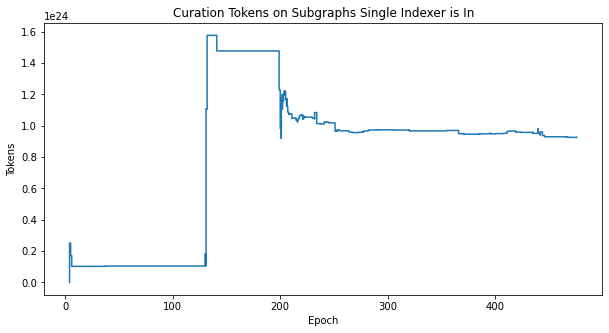

In [111]:
curation_list = []
signal_list = []
epoch_list = []
for i, j in single_indexer_name_df[['tokens', 'type', 'nameSignal', 'blockNumber', 'epoch']].iterrows():
    #print(j['epoch'])
    if j['type'] == 'MintNSignal':
        curation_list.append(int(j['tokens']))
        signal_list.append(int(j['nameSignal']))
        epoch_list.append(int(j['epoch']))
    elif j['type'] == 'BurnNSignal':
        curation_list.append(-int(j['tokens']))
        signal_list.append(-int(j['nameSignal']))
        epoch_list.append(int(j['epoch']))
    else:
        curation_list.append(0)
        signal_list.append(0)
        epoch_list.append(int(j['epoch']))
curation_list = np.cumsum(curation_list)
signal_list = np.cumsum(signal_list)
plt.figure(figsize = (10, 5))
plt.plot(epoch_list , curation_list)
plt.xlabel('Epoch')
plt.ylabel('Tokens')
#plt.ylim(1e4, 1e6)
plt.title('Curation Tokens on Subgraphs Single Indexer is In')

In [106]:
delegation_list = []
for i, j in single_indexer_name_df[['tokens', 'type', 'blockNumber']].iterrows():
    if j['type'] == 'stakeDelegateds':
        delegation_list.append(int(j['tokens']))
    elif j['type'] == 'stakeDelegatedWithdrawns':
        delegation_list.append(-int(j['tokens']))
    else:
        delegation_list.append(0)
delegation_list = np.cumsum(delegation_list)


Text(0.5, 1.0, 'Amount of Signal Curators Have for Subgraphs Single Indexer is In')

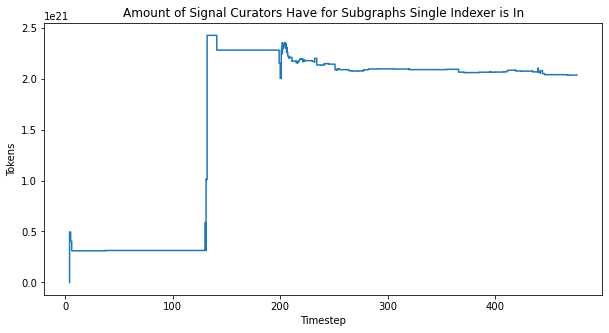

In [108]:
plt.figure(figsize = (10, 5))
plt.plot(single_indexer_name_df.epoch, signal_list)
plt.xlabel('Timestep')
plt.ylabel('Tokens')
#plt.ylim(1e4, 1e6)
plt.title('Amount of Signal Curators Have for Subgraphs Single Indexer is In')

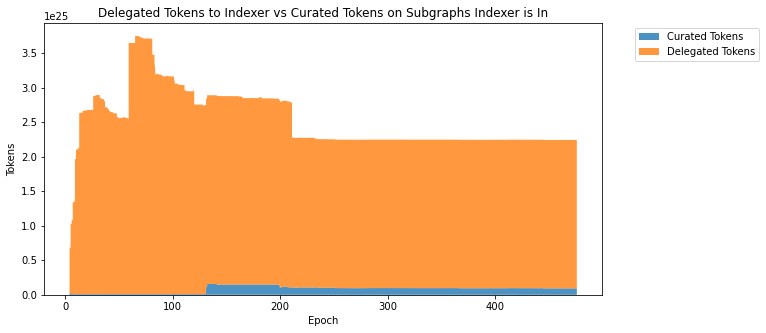

In [110]:
token_list = ['Curated Tokens', 'Delegated Tokens']
total = {}
total['Curated Tokens'] = np.array(curation_list, dtype=float)
total['Delegated Tokens'] = np.array(delegation_list, dtype=float)
fig, ax = plt.subplots(figsize=(10, 5))
ax.stackplot(list(single_indexer_name_df.epoch), total.values(), labels = total.keys(), alpha = 0.8)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax.set_xlabel('Epoch')
ax.set_ylabel('Tokens')
ax.set_title('Delegated Tokens to Indexer vs Curated Tokens on Subgraphs Indexer is In');

Here we see that there is not much of an effect on delegation as curation events happen, as the amount of curation with respect to delegation is very small. 